
# Project: Investigate a Dataset (No_show_Appointment)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> in this projet, I have analysed the No-show Appointment dataset which is available in kaggle. This dataset collects information  from 100k medical appointments in Brazil. it includes information on the Patient ID, Appointment day, sheduled day, Gender, Age, Sms recieved, No show etc..
>The data set can help to understand why patients missed their appointment and the  possibility of showing up for appointments
> I'm focusing on answering the followin qustion
<ul>
<li><a>1. the age group that showed up more for the apppointment</a></li>
<li><a>2. The gender that showed up more for the appointment</a></li>
<li><a>3. Relationship between the sickness and response to the appointmennt</a></li>
<li><a>4. The neighbourhood that showed up the most</a></li>
  </ul>  

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling
>During this step, we are going to import the csv file and display its main information. We will perform the following steps:
Display the info of the dataset and get the idea of the size, number of records and number of columns
Familiarize with the dataset and find any unusal value

### General Properties

In [2]:
# importing the csv file
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
print("Original No show appointment contains (Rows,Columns) : ",df.shape)

Original No show appointment contains (Rows,Columns) :  (110527, 14)


In [4]:
#check basis information of the dataset
print("Quick look at the dataset for some statistical values: \n\n")
df.describe()

Quick look at the dataset for some statistical values: 




,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
#Check column names and types
print("Column name with number of null values, count of value in each column and data type: \n\n")
df.info()

Column name with number of null values, count of value in each column and data type: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### No show appointment Data Cleaning and preparing for the data analysis
>Observations based on accessing the No_shhow_appointment dataset file
The columns  'PatientId', 'AppointmentID', 'Scheduled_Day','Appointment_day' are not relevant for this analysis, we can remove them.
The 'Handicap column is misspelled, we would corret it
The 'No-show' column contains a variable, we'd rename it to 'No_show' to help us analyse the column
for our analysis, the 'Handicap' column contains the value '2' which has no meaning to the data since 1 means handicapped and 0 means not handicapped, so we would drop all rows that contain 2
The age column has some values = -1 we'd drop them since age cannot be -1

#### Steps to clean the data
  <ul>
    <li> 1.Drop not required columns for this analysis.</li>
    <li> 2.Delete rows with '2' values.</li>
    <li> 3.Rename necesary columns</li>
    <li>  4. remove rows where age is = -1</li>
    </ul>

In [6]:
#drop not required columns for this analysis
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay','AppointmentDay'], axis = 1, inplace=True)
print("Sample first five rows after deleting -'PatientId', 'AppointmentID', 'ScheduledDay','AppointmentDay' :\n\n ")
df.head()

Sample first five rows after deleting -'PatientId', 'AppointmentID', 'ScheduledDay','AppointmentDay' :

 


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# renaming columns for easy anallysis of the data
df.rename(columns= {'No-show': 'No_show', 'Handcap': 'Handicap', 'Hipertension':'Hypertension'}, inplace = True)
print("Sample first five rows after renaming- No_show, Handicap and Hypertension :\n\n ")
df.head()

Sample first five rows after renaming- No_show, Handicap and Hypertension :

 


,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
#let's see the rows in Handicap that contain 2
print("Original No show appointment contains (Rows,Columns) :" )
df.query('Handicap > 1').shape

Original No show appointment contains (Rows,Columns) :


(199, 10)

In [9]:
#replacing '2' with NAN to eaisly drop the rows and printing the NAN values
df['Handicap'] = df['Handicap'].replace(2,np.NAN)
df['Handicap'] = df['Handicap'].replace(3,np.NAN)
df['Handicap'] = df['Handicap'].replace(4,np.NAN)
print(df.isna().sum())

Gender             0
Age                0
Neighbourhood      0
Scholarship        0
Hypertension       0
Diabetes           0
Alcoholism         0
Handicap         199
SMS_received       0
No_show            0
dtype: int64


In [10]:
#replacing '-1' with NAN to eaisly drop the rows and printing the NAN values
df['Age'] = df['Age'].replace(-1,np.NAN)
print(df.isna().sum())

Gender             0
Age                1
Neighbourhood      0
Scholarship        0
Hypertension       0
Diabetes           0
Alcoholism         0
Handicap         199
SMS_received       0
No_show            0
dtype: int64


In [11]:
#dropping the Na rows
df.dropna(inplace=True)
df.shape
print("Afetr Removing NaN (Rows,Columns) : ",df.shape)

Afetr Removing NaN (Rows,Columns) :  (110327, 10)


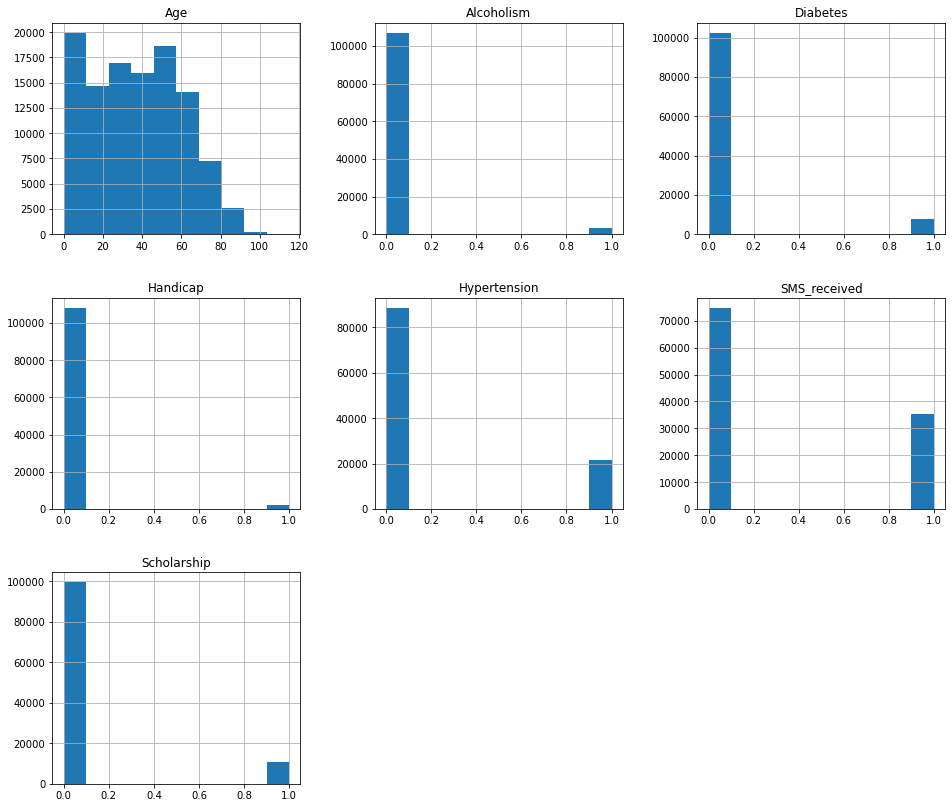

In [12]:
df.hist(figsize=(16,14));

by looking at the  histogram, the values are mostly schewed to the right although majority of the patients appear to be 0-20 but further analysis would confirm


## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (the age group that showed up more for the apppointment)

### To answer this question we need to create a mask
####  mask for the patients that showed up and 



In [13]:
present = df[df.No_show == 'No']
absent = df[df.No_show == 'Yes']

In [14]:
present

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62.0,JARDIM DA PENHA,0,1,0,0,0.0,0,No
1,M,56.0,JARDIM DA PENHA,0,0,0,0,0.0,0,No
2,F,62.0,MATA DA PRAIA,0,0,0,0,0.0,0,No
3,F,8.0,PONTAL DE CAMBURI,0,0,0,0,0.0,0,No
4,F,56.0,JARDIM DA PENHA,0,1,1,0,0.0,0,No
...,...,...,...,...,...,...,...,...,...,...
110522,F,56.0,MARIA ORTIZ,0,0,0,0,0.0,1,No
110523,F,51.0,MARIA ORTIZ,0,0,0,0,0.0,1,No
110524,F,21.0,MARIA ORTIZ,0,0,0,0,0.0,1,No
110525,F,38.0,MARIA ORTIZ,0,0,0,0,0.0,1,No


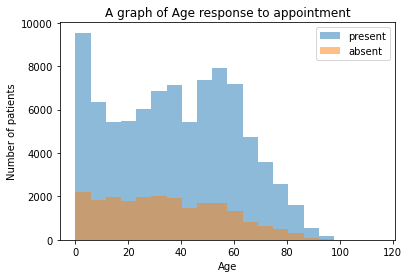

In [15]:
plt.hist(present.Age, alpha = 0.5, bins = 20)
plt.hist(absent.Age, alpha = 0.5, bins = 20)
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.legend(['present', 'absent'])
plt.title('A graph of Age response to appointment');

Infants show up most often then people around 50-55. But between 1-65 years old, the rate of no-shows seems to be higher than 20%.

### we then analyse and visualize ho different age groups resonponded to the appointment

### Research Question 2  ( The gender that showed up more for the appointment)

In [16]:
present.Gender.value_counts(), absent.Gender.value_counts()

(F    57162
 M    30887
 Name: Gender, dtype: int64,
 F    14568
 M     7710
 Name: Gender, dtype: int64)

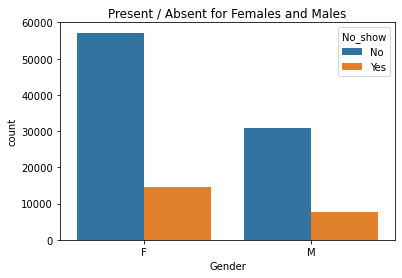

Out of 71730 appointments made by females, 14568 were missed with the ratio of 20%.
Out of 38597 appointments made by males, 7710 were missed with the ratio of 20%.


In [17]:
present_female = len(df.loc[df['Gender'] == "F"])
present_male = len(df.loc[df['Gender'] == "M"])

absent_female = len(df.query('No_show == "Yes" and Gender == "F"'))
absent_male = len(df.loc[(df['Gender'] == "M") & (df['No_show'] == "Yes")])

absent_ratio_female = int(round(absent_female/present_female*100))
absent_ratio_male = int(round(absent_male/present_male*100))

ax = sns.countplot(x=df.Gender, hue=df.No_show, data=df)
ax.set_title("Present / Absent for Females and Males")
x_ticks_labels=['Female', 'Male']
plt.show();

print('Out of {} appointments made by females, {} were missed with the ratio of {}%.'.format(present_female,absent_female,absent_ratio_female))
print('Out of {} appointments made by males, {} were missed with the ratio of {}%.'.format(present_male, absent_male, absent_ratio_male))

### Research Question 3  (Relationship between the sickness and response to the appointment )

<Figure size 432x288 with 0 Axes>

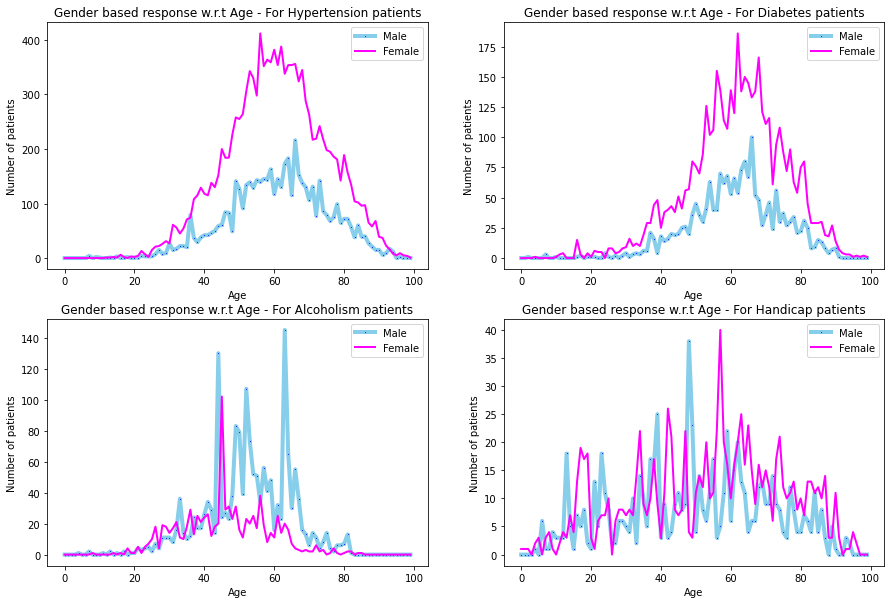

In [18]:
plt.figure(1)
plt.figure(figsize = (15,10))
iter_cols = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']
for col in iter_cols: 
    plt.subplot(int(str(22)+str((iter_cols.index(col)+1))))
    range_df = pd.DataFrame()
    range_df['Age'] = range(100) # Setting up for the age limit of 100 only
    Male_Hyper = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 'M') & (df[col] == 1) & (df.No_show == 'No') ]))
    Female_Hyper = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 'F') & (df[col] == 1)& (df.No_show == 'No')]))

    # multiple line plot
    plt.plot( range_df, Male_Hyper, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=4)
    plt.plot( range_df, Female_Hyper, marker='', color='magenta', linewidth=2)

    plt.legend(['Male','Female'])
    plt.xlabel('Age')
    plt.ylabel('Number of patients')
    # plt.figsize=(20,10)
    plt.title('Gender based response w.r.t Age - For {} patients'.format(col));

### From the anlysis above, i can be gathered that:
#### 1. Within the age of 40 - 80, patients with Hypertension and Diabetes were mostly women and responded to appointments more than men of the sam age group and sickness
#### 2. Whereas men wihin the age of 40- 70 were more aloholics and responended to appointments, women within 40-  to 50 appeared to be more alcoholics than the other age group
#### 3. Both genders who are hanicapped responed equally to their appointments 

### Research Question 4  (The neighbourhood that showed up the most )

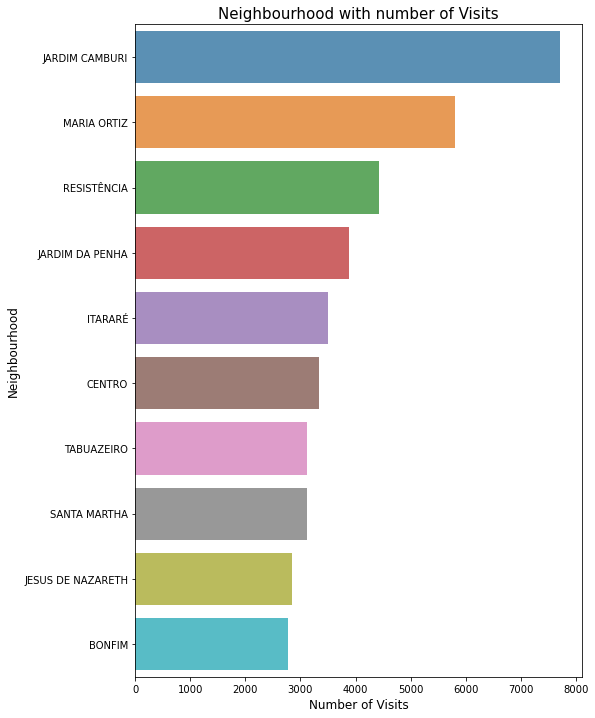

In [19]:
# Top 10 Neighbourhood values based on the Visits
cnt_srs = df['Neighbourhood'].value_counts().head(10)
plt.figure(figsize=(8,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Number of Visits', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12)
plt.title("Neighbourhood with number of Visits", fontsize=15)
plt.show()

#### From the analysis above, it is observed that the neighbourhood with the highest response to appoinment is the 'Jardim Camburi' neighbourhood

### Research Question 5  (Scholarshi response to appointment )

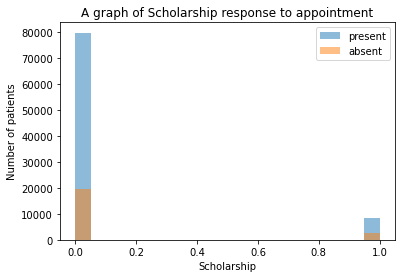

In [20]:
plt.hist(present.Scholarship, alpha = 0.5, bins = 20)
plt.hist(absent.Scholarship, alpha = 0.5, bins = 20)
plt.xlabel('Scholarship')
plt.ylabel('Number of patients')
plt.legend(['present', 'absent'])
plt.title('A graph of Scholarship response to appointment');

#### From the above analysis, about 80,000 patients did not receive government assisted scholarship but still showed up for appointments. whereas, about 3000 out of about 10000 patients  who received govenment asssited scholarship showd up or appointment

### Research Question 6  (SMS response to appointment )

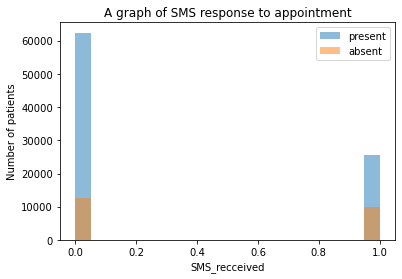

In [21]:
plt.hist(present.SMS_received, alpha = 0.5, bins = 20)
plt.hist(absent.SMS_received, alpha = 0.5, bins = 20)
plt.xlabel('SMS_recceived')
plt.ylabel('Number of patients')
plt.legend(['present', 'absent'])
plt.title('A graph of SMS response to appointment');

#### From the analysis above, about 60000 patients did not receive sms for confirmtion of their appointment but still showd up for appointent. Whereas, about 10000 of the about 25000 who receeived sms did not show up for appointment 

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

<a id='conclusions'></a>
## Conclusions

* 1. The Handicap column containe numbers that had no meaning to the data(2,3,4) in which 0 was 'no' and  was 'yes' which ld to the removal of rows which might have beenn relevant to the analyis

<a id='conclusions'></a>
## Conclusions

* 1. Of those patients who have showed up for appointment, majority of the age group within 20 to 40 did not show up for the appointment when compared to age groups 0-20, 40-60 and 60 plus. of these 20 to 40 age group, Female patients were not present for appoinments a compared with male of similar age group.

* 2. Hypertension and Diabetes Patients within the age group 40 - 80 were present for appointment and female patients were mostly present

* 3. Male Alcoholism patients were bigger especially the 40- 70 agge groups and were present than the female although female patients from the age group 40- 50 had more alcoholics than females in of the same age groups 

* 4.SMS and Sholarship didn,t really seem to improve the rsponseof patients for appointments

* 5. Majority of the visits happend from Jardim Camburi, but there was not much information to further explore reasons why it is so. the most logicl eplaination is that majority of the patients reside in the neighbourhood

## Female patients with Hypertenion and Diabetes would be most likely present for appointment whereas men with Alcoholism would most likely be present for appointtmentt

###  In addition to materials from udacity, i sourced information on the folllowing websites
<ul>
    <li>www.stackoverflow.com</li>
    <li>www.pythonspot.com</li>
<li>www.simplilearnn.com</li>
<li>www.geekforgeeks.org<li>
   </ul>